# Step 1: Initial Setup and Layer Definitions

In [ ]:
import numpy as np

# Setting a random seed for reproducibility
np.random.seed(42)

# Network architecture parameters
input_features = 10  # This can be adjusted based on the actual input features
hidden_neurons_layer1 = 64
hidden_neurons_layer2 = 32
output_features = 1  # For regression, the output is typically a single value

# Activation function: ReLU for hidden layers
def relu(x):
    return np.maximum(0, x)

# Derivative of ReLU for backpropagation
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Initialize weights and biases
# Layer 1
W1 = np.random.randn(input_features, hidden_neurons_layer1) * np.sqrt(2. / input_features)
b1 = np.zeros((1, hidden_neurons_layer1))

# Layer 2
W2 = np.random.randn(hidden_neurons_layer1, hidden_neurons_layer2) * np.sqrt(2. / hidden_neurons_layer1)
b2 = np.zeros((1, hidden_neurons_layer2))

# Output layer
W3 = np.random.randn(hidden_neurons_layer2, output_features) * np.sqrt(2. / hidden_neurons_layer2)
b3 = np.zeros((1, output_features))

# Let's confirm the initialization is correct
(W1.shape, b1.shape), (W2.shape, b2.shape), (W3.shape, b3.shape)

(((10, 64), (1, 64)), ((64, 32), (1, 32)), ((32, 1), (1, 1)))

# Step 2: Forward Pass and Loss Computation

In [ ]:
# Assuming X_train represents our input features and y_train the true output values for the training data
# For demonstration, let's create some dummy data
num_samples = 100
X_train = np.random.rand(num_samples, input_features)
y_train = np.random.rand(num_samples, output_features)  # True values for regression

# Forward pass function
def forward_pass(X):
    # Hidden Layer 1
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)

    # Hidden Layer 2
    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)

    # Output Layer
    Z3 = np.dot(A2, W3) + b3
    output = Z3  # No activation function for the output layer in regression

    return output, Z1, A1, Z2, A2, Z3

# Loss function: Mean Squared Error
def compute_loss(y_pred, y_true):
    loss = np.mean((y_pred - y_true) ** 2)
    return loss

# Performing a forward pass and computing the loss
output, Z1, A1, Z2, A2, Z3 = forward_pass(X_train)
loss = compute_loss(output, y_train)

loss

0.1749099225973701

# Step 3: Backpropagation and Gradient Updates

In [ ]:
# Learning rate
learning_rate = 0.01

# Backpropagation
def backpropagation_corrected(X, y_true, Z1, A1, Z2, A2, Z3, output, W1, b1, W2, b2, W3, b3):
    # Output layer to Hidden Layer 2 gradients
    dZ3 = output - y_true
    dW3 = np.dot(A2.T, dZ3) / num_samples
    db3 = np.sum(dZ3, axis=0, keepdims=True) / num_samples

    # Hidden Layer 2 to Hidden Layer 1 gradients
    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = np.dot(A1.T, dZ2) / num_samples
    db2 = np.sum(dZ2, axis=0, keepdims=True) / num_samples

    # Hidden Layer 1 to Input layer gradients
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / num_samples
    db1 = np.sum(dZ1, axis=0, keepdims=True) / num_samples

    # Update the weights and biases
    W1_update = W1 - learning_rate * dW1
    b1_update = b1 - learning_rate * db1
    W2_update = W2 - learning_rate * dW2
    b2_update = b2 - learning_rate * db2
    W3_update = W3 - learning_rate * dW3
    b3_update = b3 - learning_rate * db3

    return W1_update, b1_update, W2_update, b2_update, W3_update, b3_update

# Performing backpropagation and updating the weights and biases
W1, b1, W2, b2, W3, b3 = backpropagation_corrected(X_train, y_train, Z1, A1, Z2, A2, Z3, output, W1, b1, W2, b2, W3, b3)

# Checking if the loss has decreased after one update
output_after_update, _, _, _, _, _ = forward_pass(X_train)
loss_after_update = compute_loss(output_after_update, y_train)

loss, loss_after_update

(0.1749099225973701, 0.171008724135142)

# Step 4: Training the Model Over Multiple Epochs

In [ ]:
# Number of epochs for training
epochs = 1000
loss_history = []

for epoch in range(epochs):
    # Forward pass
    output, Z1, A1, Z2, A2, Z3 = forward_pass(X_train)
    # Compute loss
    current_loss = compute_loss(output, y_train)
    loss_history.append(current_loss)
    # Backpropagation and updating weights and biases
    W1, b1, W2, b2, W3, b3 = backpropagation_corrected(X_train, y_train, Z1, A1, Z2, A2, Z3, output, W1, b1, W2, b2, W3, b3)

    # Logging
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {current_loss}")

# Final loss
final_loss = loss_history[-1]
final_loss

Epoch 0, Loss: 0.171008724135142
Epoch 100, Loss: 0.08912593941907643
Epoch 200, Loss: 0.07357108749974584
Epoch 300, Loss: 0.0672360357566766
Epoch 400, Loss: 0.0635375322085518
Epoch 500, Loss: 0.06082679087752405
Epoch 600, Loss: 0.058460670337312066
Epoch 700, Loss: 0.056437371184612006
Epoch 800, Loss: 0.0546208175836735
Epoch 900, Loss: 0.052989082681230155


0.051574636230011614

# visualize the loss over epochs

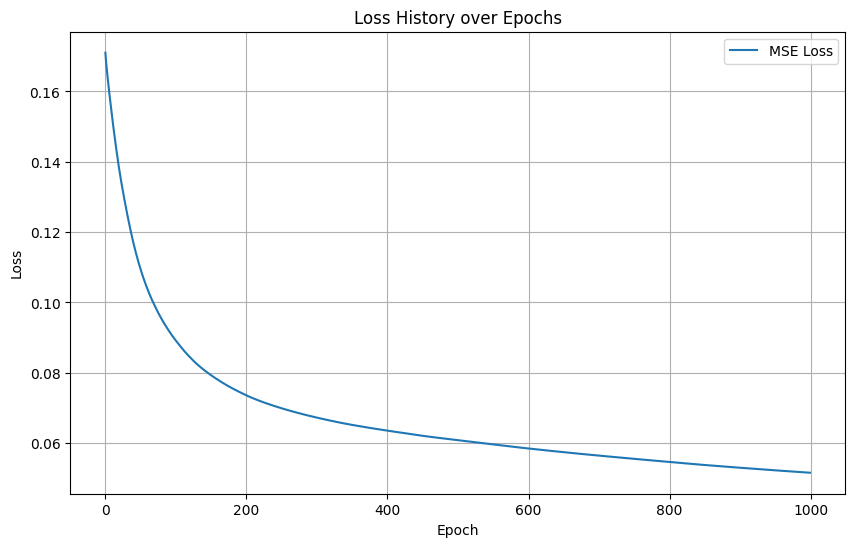

In [ ]:
import matplotlib.pyplot as plt

# Plotting the loss history
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='MSE Loss')
plt.title('Loss History over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()